In [1]:
from ml_utils import *

In [5]:
dtf = pd.read_csv("train.csv")
dtf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


len dtf: 1460
Id --> Nas: 0 (0.0%)
    # possible pk
MSSubClass --> Nas: 0 (0.0%)
MSZoning --> Nas: 0 (0.0%)
LotFrontage --> Nas: 259 (17.7%)
LotArea --> Nas: 0 (0.0%)
Street --> Nas: 0 (0.0%)
Alley --> Nas: 1369 (93.8%)
LotShape --> Nas: 0 (0.0%)
LandContour --> Nas: 0 (0.0%)
Utilities --> Nas: 0 (0.0%)
LotConfig --> Nas: 0 (0.0%)
LandSlope --> Nas: 0 (0.0%)
Neighborhood --> Nas: 0 (0.0%)
Condition1 --> Nas: 0 (0.0%)
Condition2 --> Nas: 0 (0.0%)
BldgType --> Nas: 0 (0.0%)
HouseStyle --> Nas: 0 (0.0%)
OverallQual --> Nas: 0 (0.0%)
OverallCond --> Nas: 0 (0.0%)
YearBuilt --> Nas: 0 (0.0%)
YearRemodAdd --> Nas: 0 (0.0%)
RoofStyle --> Nas: 0 (0.0%)
RoofMatl --> Nas: 0 (0.0%)
Exterior1st --> Nas: 0 (0.0%)
Exterior2nd --> Nas: 0 (0.0%)
MasVnrType --> Nas: 8 (0.5%)
MasVnrArea --> Nas: 8 (0.5%)
ExterQual --> Nas: 0 (0.0%)
ExterCond --> Nas: 0 (0.0%)
Foundation --> Nas: 0 (0.0%)
BsmtQual --> Nas: 37 (2.5%)
BsmtCond --> Nas: 37 (2.5%)
BsmtExposure --> Nas: 38 (2.6%)
BsmtFinType1 --> Nas: 37 (2.

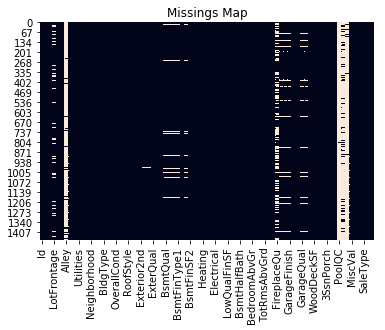

In [6]:
check_Nas(dtf, plot="map", figsize=(10,5)

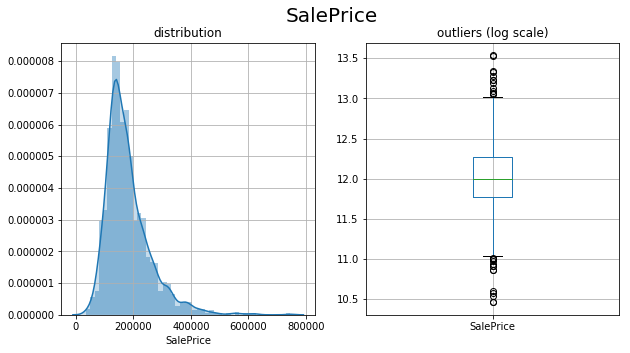

In [10]:
freqdist_plot(dtf, "SalePrice", box_logscale=True, figsize=(10,5))

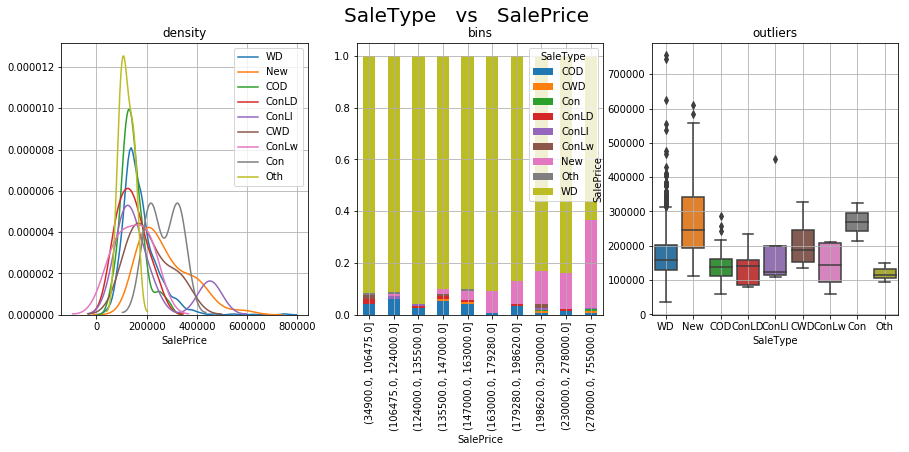

In [23]:
bivariate_plot(dtf, x="SaleType", y="SalePrice", figsize=(15,5))

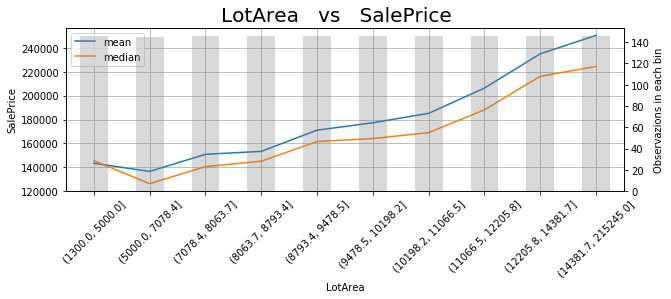

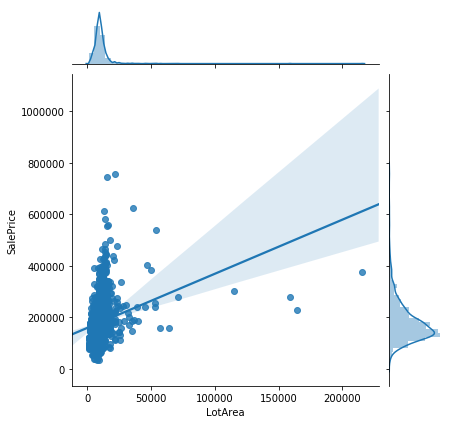

In [17]:
bivariate_plot(dtf, x="LotArea", y="SalePrice", figsize=(10,3))